In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("Updated_Netflix.csv")

In [3]:
df.isna().sum()

Unnamed: 0         0
show_id            0
type               0
title              0
director        2635
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
tags               1
dtype: int64

In [4]:
df.tail()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
8803,8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Zombie DumbWhile living alone in a spooky town...
8804,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,ZombielandLooking to survive in a world taken ...
8805,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","ZoomDragged from civilian life, a former super..."
8806,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,ZubaanA scrappy but poor boy worms his way int...
8807,8807,s8808,TV Show,All of Us Are Dead,NaN,"Yoon Chan-young, Park Ji-hu, Cho Yi-hyun, Lomo...",South Korea,"January 28, 2022",2022,TV-MA,1 Season,"Korean TV Shows, TV Dramas, TV Horror",A high school becomes ground zero for a zombie...,NaN


In [5]:
df["tags"] = df["title"] + df["description"] + df["type"] + df["listed_in"]

In [6]:
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is DeadAs her father nears the en...
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Blood & WaterAfter crossing paths at a party, ..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,GanglandsTo protect his family from a powerful...
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Jailbirds New OrleansFeuds, flirtations and to..."
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kota FactoryIn a city of coaching centers know...


In [7]:
vec = TfidfVectorizer(stop_words='english')

In [8]:
vector = vec.fit_transform(df["tags"])

In [9]:
similarity = cosine_similarity(vector)

In [80]:
def find(movie):
    movie = movie.lower()
    index = df[df["title"].str.lower() == movie].index[0]
    similarity_scores = list(enumerate(similarity[index]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_5 = sorted_scores[1:6]  # Exclude the movie itself at index 0
    movie_indices = [i[0] for i in top_5]
    return df['title'].iloc[movie_indices]

In [82]:
find("Squid Game")

1440      Nailed It! Mexico
1562    Alice in Borderland
4143                 Sparta
3684              Kakegurui
2827      The Circle Brazil
Name: title, dtype: object

In [84]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def show_posters(movie_list):
    for title in movie_list:
        url = f"https://www.omdbapi.com/?t={title}&apikey=857db68"
        data = requests.get(url).json()
        
        if data["Response"] == "True" and data["Poster"] != "N/A":
            response = requests.get(data["Poster"])
            img = Image.open(BytesIO(response.content))
            
            plt.imshow(img)
            plt.axis('off')
            plt.title(data["Title"])
            plt.show()
        else:
            print(f"No poster found for {title}")

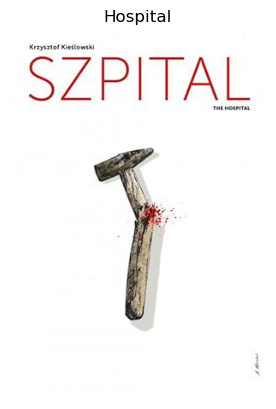

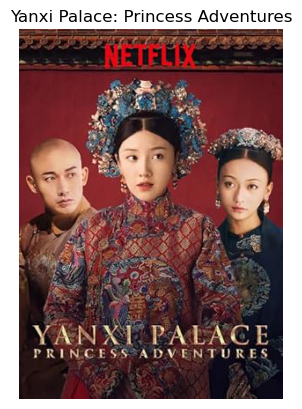

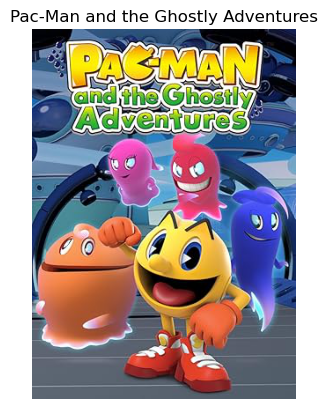

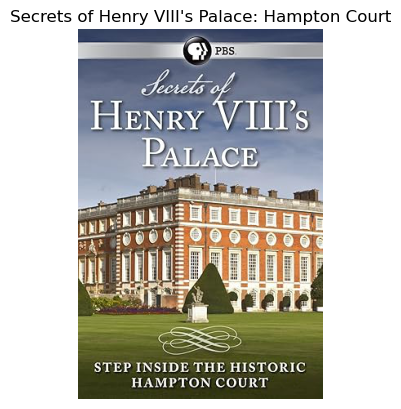

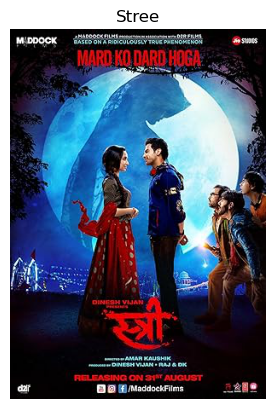

In [92]:
show_posters(find("Bhool Bhulaiyaa"))

In [94]:
import joblib
joblib.dump(similarity,"similarity.joblib")

['similarity.joblib']